In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mall_customers = pd.read_csv("/content/drive/MyDrive/Datasets/Mall_Customer.csv")
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# missing values
mall_customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
mall_customers['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

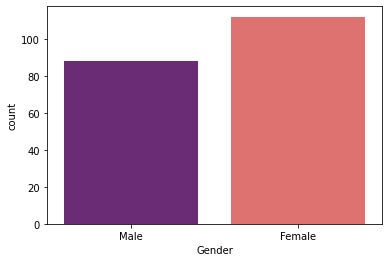

In [ ]:
sns.countplot(x = 'Gender', data = mall_customers, palette='magma')

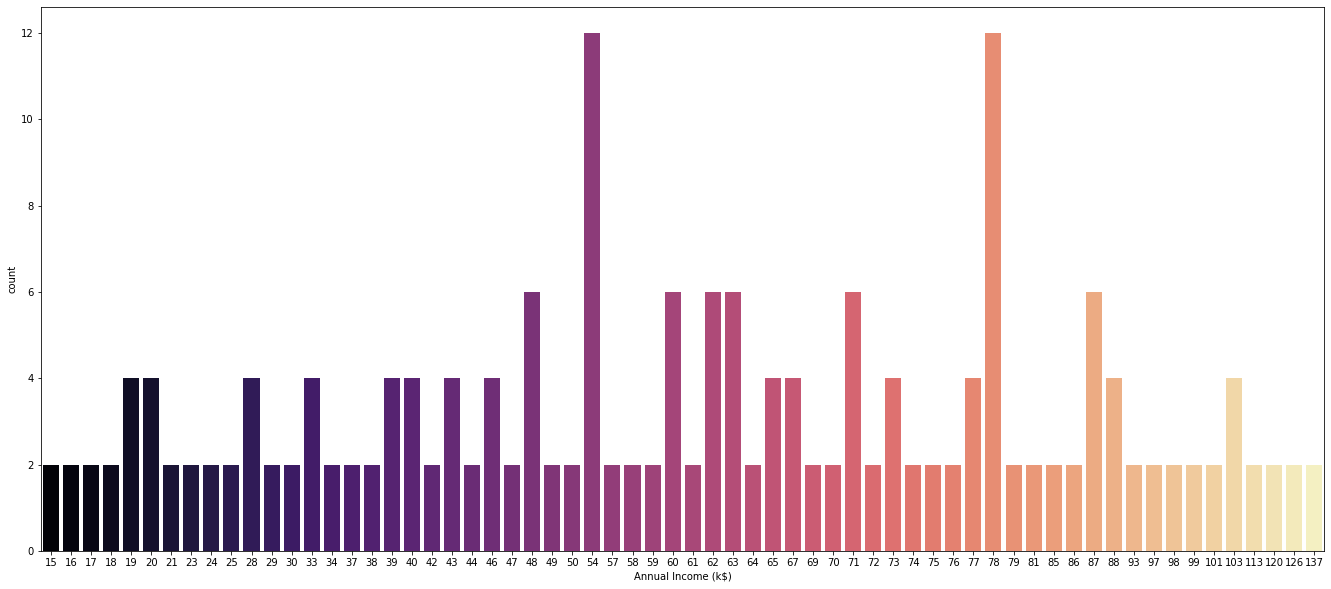

In [ ]:
plt.figure(figsize=(23,10))
sns.countplot(x = 'Annual Income (k$)', data = mall_customers, palette='magma')

**Top two Annal Incomes are 54 and 78**

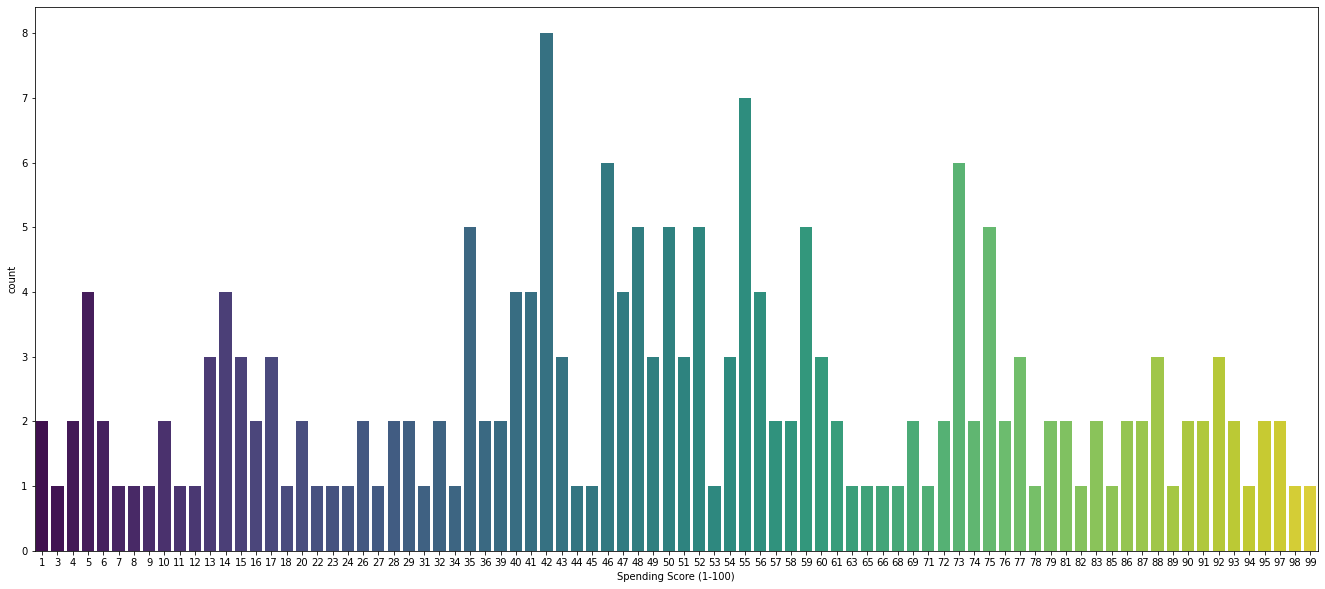

In [ ]:
plt.figure(figsize=(23,10))
sns.countplot(x = 'Spending Score (1-100)', data = mall_customers, palette='viridis')

**Top two spending scores are 42 and 55**

### **Features**

In [ ]:
X = mall_customers.iloc[:, [3,4]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


**Elbow Method**

To find optimum number of clusters, k

* In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 15. 
* For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). 
* WCSS is the sum of squared distance between each point and the centroid in a cluster. 
* When we plot the WCSS with the K value, the plot looks like an Elbow. 
* As the number of clusters increases, the WCSS value will start to decrease. 
* When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. 
* From this point, the graph starts to move almost parallel to the X-axis. 
* The K value corresponding to this point is the optimal K value or an optimal number of clusters.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Use elbow method to find optimum number of cluster i.e. value of 'K'
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30259.65720728547,
 25095.70320999756,
 21830.041978049434,
 20736.679938924128,
 17702.59593229628,
 15810.838613705502,
 14763.330402558204,
 13165.329070181628,
 12064.939000692291]

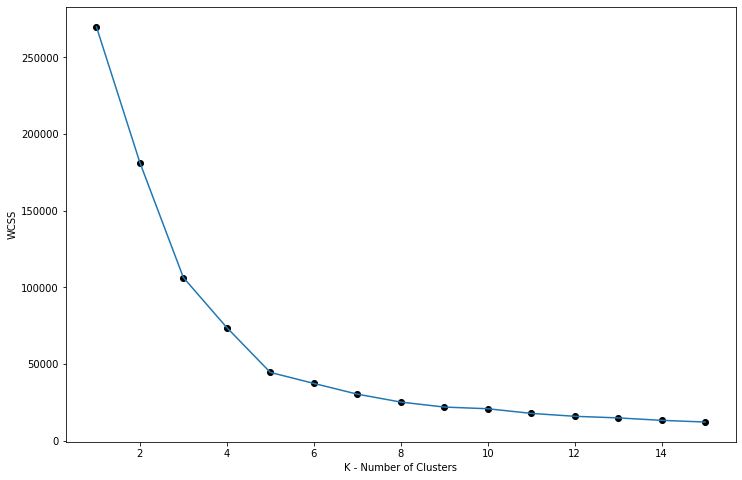

In [ ]:
# Plot visualization b/w WCSS and Number of Clusters(K)
plt.figure(figsize=(12,8))
plt.plot(range(1,16), wcss)
# to view the points clearly we add scatter plot in addition to line
plt.scatter(range(1,16), wcss, c = 'black', marker='o')
plt.xlabel("K - Number of Clusters")
plt.ylabel("WCSS")
plt.show()


**Optimal Number of Clusters, K= 5**

**K-means with random centroid initialization**

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'random', max_iter= 300, n_init=10, random_state=0)

In [ ]:
kmeans.fit(X)

KMeans(init='random', n_clusters=5, random_state=0)

In [ ]:
y_clusters = kmeans.predict(X)
y_clusters

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3,
       0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 4, 3, 4, 1, 4, 1, 4,
       3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

### **Performance Evaluation using Silhoutte Score**

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_clusters)
silhouette_avg

0.553931997444648

### **K-Means with k-means++ centroid initialization**

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter= 300, n_init=10, random_state=0)

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [ ]:
y_clusters = kmeans.predict(X)
y_clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

### **Performance Evaluation using Silhoutte Score**

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_clusters)
silhouette_avg

0.553931997444648

In [ ]:
# Centroids
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

### **Clustering Visualization**

**Convert x to a numpy array, y is already a numpy array**

In [ ]:
y_clusters.astype

<function ndarray.astype>

In [ ]:
x_array = np.array(X)
x_array

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
x_array.astype

<function ndarray.astype>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


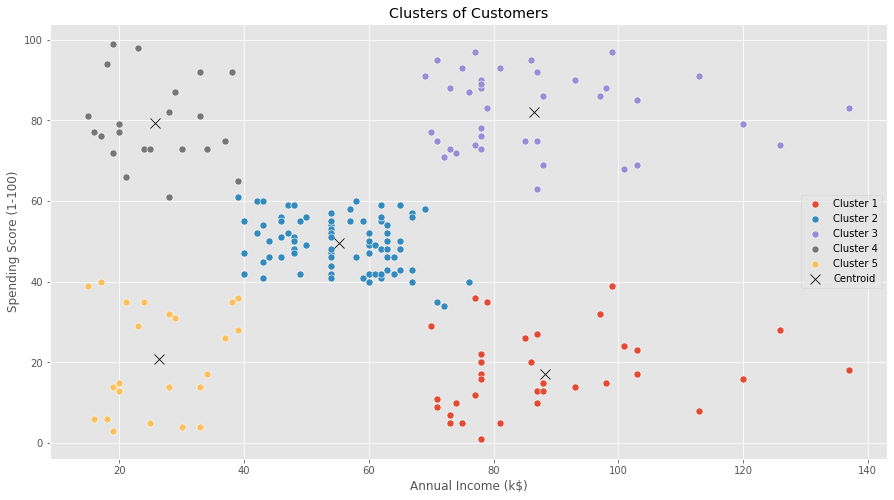

In [ ]:
# Visualization of Cluster
plt.style.use("ggplot")
plt.figure(figsize=(15,8))
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 

# x_array contain two values, Annual Income and Spending Score
# Index 0 - contains Annual Income and index 1 contains spending score
sns.scatterplot( x = x_array[y_clusters == 0, 0], y = x_array[y_clusters == 0, 1], label = "Cluster 1", s = 50)
sns.scatterplot( x = x_array[y_clusters == 1, 0], y = x_array[y_clusters == 1, 1], label = "Cluster 2", s = 50)
sns.scatterplot( x = x_array[y_clusters == 2, 0], y = x_array[y_clusters == 2, 1], label = "Cluster 3", s = 50)
sns.scatterplot( x = x_array[y_clusters == 3, 0], y = x_array[y_clusters == 3, 1], label = "Cluster 4", s = 50)
sns.scatterplot( x = x_array[y_clusters == 4, 0], y = x_array[y_clusters == 4, 1], label = "Cluster 5", s = 50)
#plot the centroid of the cluster inside the plot
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',color='black',label='Centroid',s=100)
plt.show()

Text(0.5, 0, 'Spending Score (1-100)')

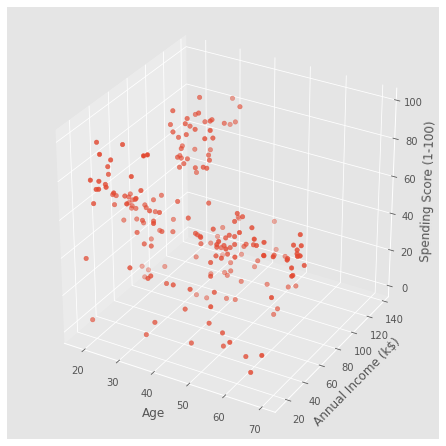

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.scatter(mall_customers['Age'], mall_customers['Annual Income (k$)'], mall_customers['Spending Score (1-100)'])
#ax.scatter(dataframe['x2'], dataframe['x1'], predicted)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

In [ ]:
x = mall_customers.iloc[:, 2:].values

# let's check the shape of x
print(x.shape)

(200, 3)


In [ ]:
x

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

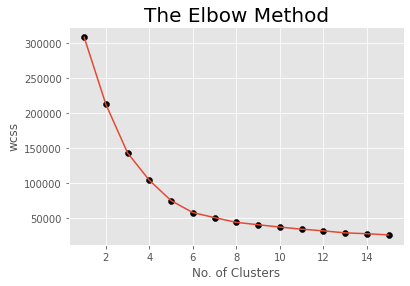

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 16):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 16), wcss)
# to view the points clearly we add scatter plot in addition to line
plt.scatter(range(1,16), wcss, c = 'black', marker='o')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

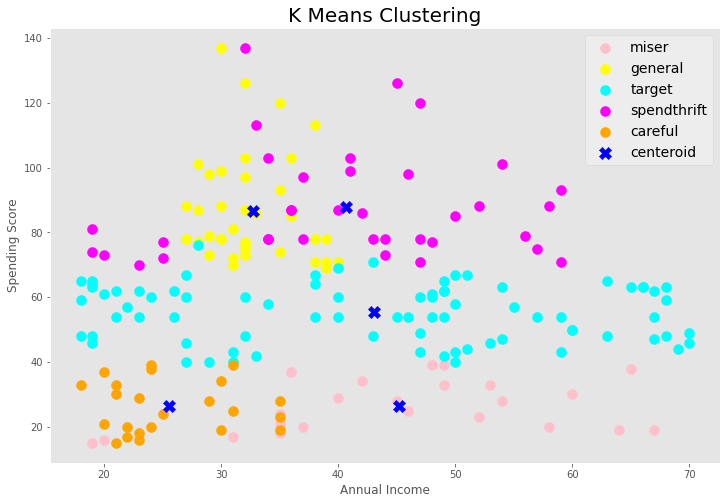

In [ ]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.figure(figsize=(12,8))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 150, c = 'blue' , marker = 'X',label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

## **Hierarchical Clustering**
Agglomerative Clustering - Bottom up approach
### **Dendogram**
* It is a tree like diagram, it illustrates the arrangement of cluster produced by analysis of
cluster
* Dendogram is used by hiererchical clustering to find number of clusters
* Dendogram is summary of distance matrix between two different clusters

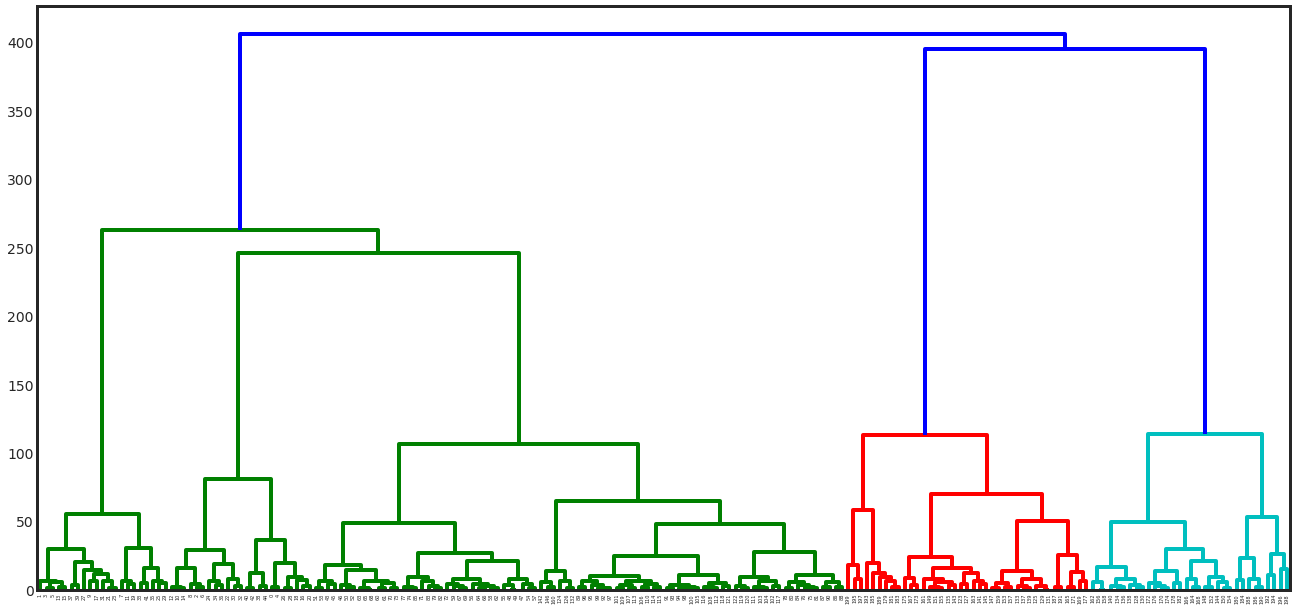

In [ ]:
import scipy.cluster.hierarchy as sch
sns.set_style('white')
fig = plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

### **Number of clusters can be found by number of vertical lines in the top**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

In [ ]:
y_hc =hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])